# Pandas- Merge, Sort, Filter

In this notebook we'll use merge, sort and filter methods on the given datasets

In [1]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

There are two datasets. Yearly temperature and rainfall.

# Task 1: Read the data into a Pandas DataFrame

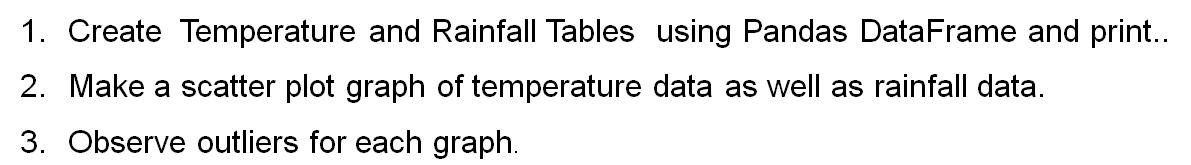

In [2]:
df_temp = pd.read_csv("/content/tempYearly.csv")
df_rain = pd.read_csv("/content/rainYearly.csv")

In [3]:
df_temp.head()

,Year,Temperature
0,1956,16.99
1,1957,10.34
2,1958,21.01
3,1959,23.68
4,1960,24.59


In [4]:
df_rain.head()

,Year,Rainfall
0,1956,1.01
1,1957,1.66
2,1958,3.50
3,1959,3.31
4,1960,3.61


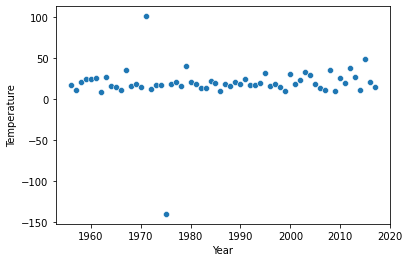

In [5]:
#Scatterplot for temperature
sns.scatterplot(x='Year', y='Temperature', data=df_temp)

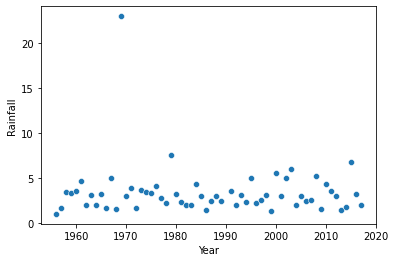

In [6]:
#Scatterplot for rainfall
sns.scatterplot(x='Year', y='Rainfall', data=df_rain)

The data points that are far off from the rest of the data are called outliers. We cn find them in both the datasets.

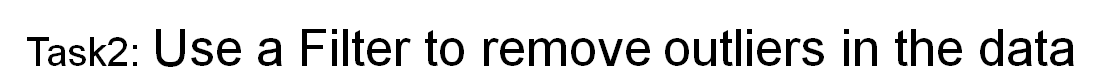

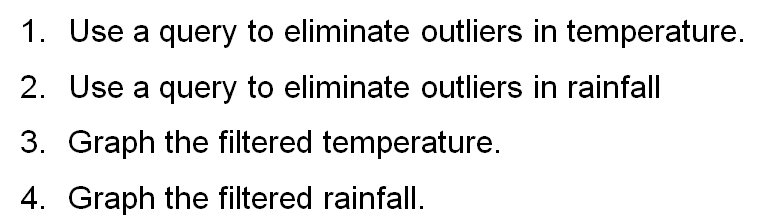

Since the most of our data lies between 0 ans 40 degrees,
let's take that as the limit for the data

In [7]:
df_temp_f = df_temp.query('Temperature < 40 & Temperature > 0')

Let's plot to check if the outliers are removed

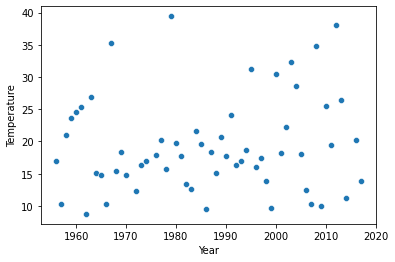

In [8]:
sns.scatterplot(x='Year', y='Temperature', data=df_temp_f)

Let's Do the same with the rainfall data

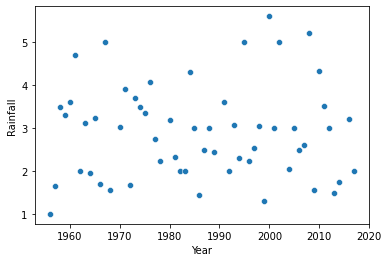

In [9]:
df_rain_f = df_rain.query('Rainfall < 6 & Rainfall > 1')
sns.scatterplot(x='Year', y='Rainfall', data=df_rain_f)


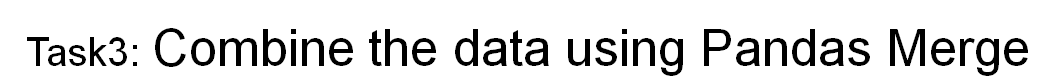


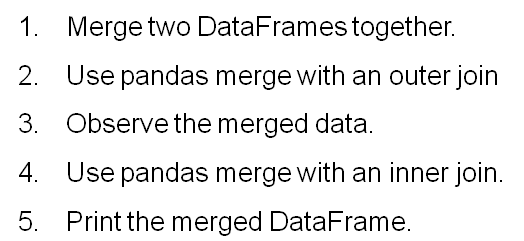

In [10]:
df_merge = pd.merge(df_temp_f, df_rain_f, on='Year', how='outer')
df_merge

,Year,Temperature,Rainfall
0,1956,16.99,1.01
1,1957,10.34,1.66
2,1958,21.01,3.50
3,1959,23.68,3.31
4,1960,24.59,3.61
...,...,...,...
56,2014,11.24,1.76
57,2016,20.29,3.21
58,2017,13.81,2.00
59,1971,NaN,3.92


We get NaNs for the entries that we don't have data for.

In [11]:
df_merge_i= pd.merge(df_temp_f, df_rain_f, on='Year', how='inner')
df_merge_i

,Year,Temperature,Rainfall
0,1956,16.99,1.01
1,1957,10.34,1.66
2,1958,21.01,3.50
3,1959,23.68,3.31
4,1960,24.59,3.61
5,1961,25.29,4.71
6,1962,8.77,2.00
7,1963,26.88,3.12
8,1964,15.04,1.96
9,1965,14.78,3.23


While if we merge the data using an inner join, we get an intesection of the data and hence have no NaN values

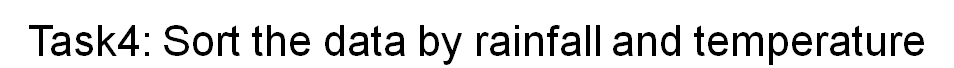

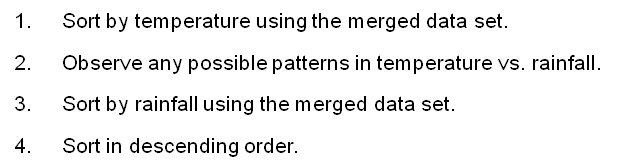

In [12]:
df_merge.sort_values(by='Temperature').head()

,Year,Temperature,Rainfall
6,1962,8.77,2.00
28,1986,9.55,1.45
41,1999,9.68,1.32
51,2009,9.94,1.56
10,1966,10.27,1.71


In [13]:
df_merge.sort_values(by='Rainfall').head()

,Year,Temperature,Rainfall
0,1956,16.99,1.01
41,1999,9.68,1.32
28,1986,9.55,1.45
55,2013,26.41,1.50
51,2009,9.94,1.56


In [14]:
df_merge.sort_values(by='Temperature', ascending=False)

,Year,Temperature,Rainfall
21,1979,39.42,NaN
54,2012,38.01,3.00
11,1967,35.26,5.00
50,2008,34.81,5.20
45,2003,32.40,NaN
...,...,...,...
41,1999,9.68,1.32
28,1986,9.55,1.45
6,1962,8.77,2.00
59,1971,NaN,3.92


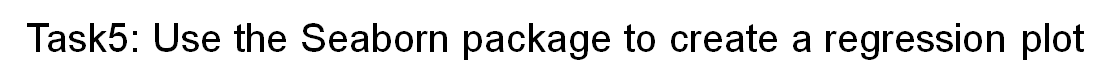

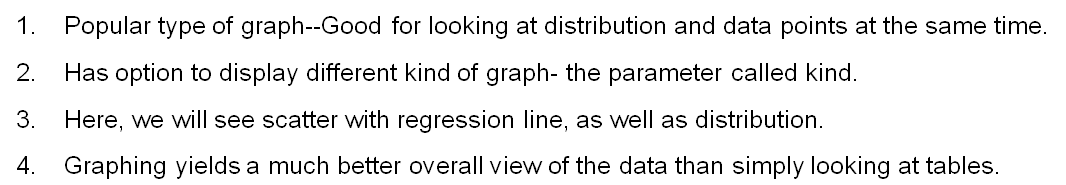

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 864x432 with 0 Axes>

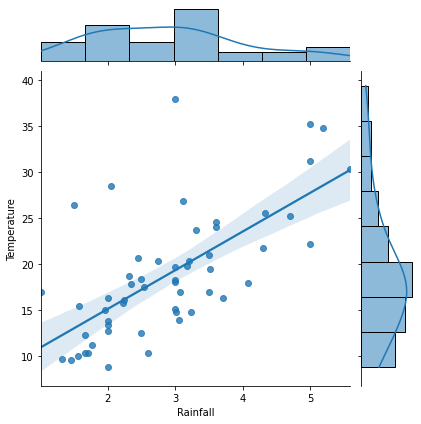

In [15]:
plt.figure(figsize=[12,6])
sns.jointplot('Rainfall', 'Temperature', data=df_merge, kind='reg')